In [1]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

from myPaCMAP import *

In [27]:
%matplotlib inline

def moving_average(a, window_size):
    cumulative_sum = np.cumsum(np.insert(a, 0, 0)) 
    middle = (cumulative_sum[window_size:] - cumulative_sum[:-window_size]) / window_size
    r = np.arange(1, window_size-1, 2)
    begin = np.cumsum(a[:window_size-1])[::2] / r
    end = (np.cumsum(a[:-window_size:-1])[::2] / r)[::-1]
    return np.concatenate((begin, middle, end))

def low_pass_filter(data, alpha):
    """
    Apply a low-pass filter to the data using exponential moving average.
    """
    filtered_data = [data[0]]  # Initialize filtered data with the first value
    for i in range(1, len(data)):
        filtered_data.append(alpha * data[i] + (1 - alpha) * filtered_data[-1])
    return np.array(filtered_data)

def draw_results(path, mode=0, window_size=9, alpha=0.1):

    history_rewards = torch.load(os.path.join(path, "history_rewards.pt"))
    print(len(history_rewards))

    iter_len = []

    for i in range(1, 46):
        count = 0
        for filename in os.listdir(path):
            if filename.startswith("iter{}_step".format(i)):
                count += 1
        iter_len.append(count)

    res = []
    for num in iter_len:
        subset_sum = sum(history_rewards[:num])
        res.append(subset_sum)
        history_rewards = history_rewards[num:]

    print(len(res))

    if mode==0:
        res_avg = moving_average(res, window_size)

        plt.figure(figsize=(16, 6))

        plt.subplot(121)
        plt.plot(res)

        plt.subplot(122)
        plt.plot(res_avg)

        plt.show()

    elif mode==1:
        res_avg = low_pass_filter(res, alpha=alpha)

        plt.figure(figsize=(16, 6))

        plt.subplot(121)
        plt.plot(res)

        plt.subplot(122)
        plt.plot(res_avg)

        plt.show()

1440
45


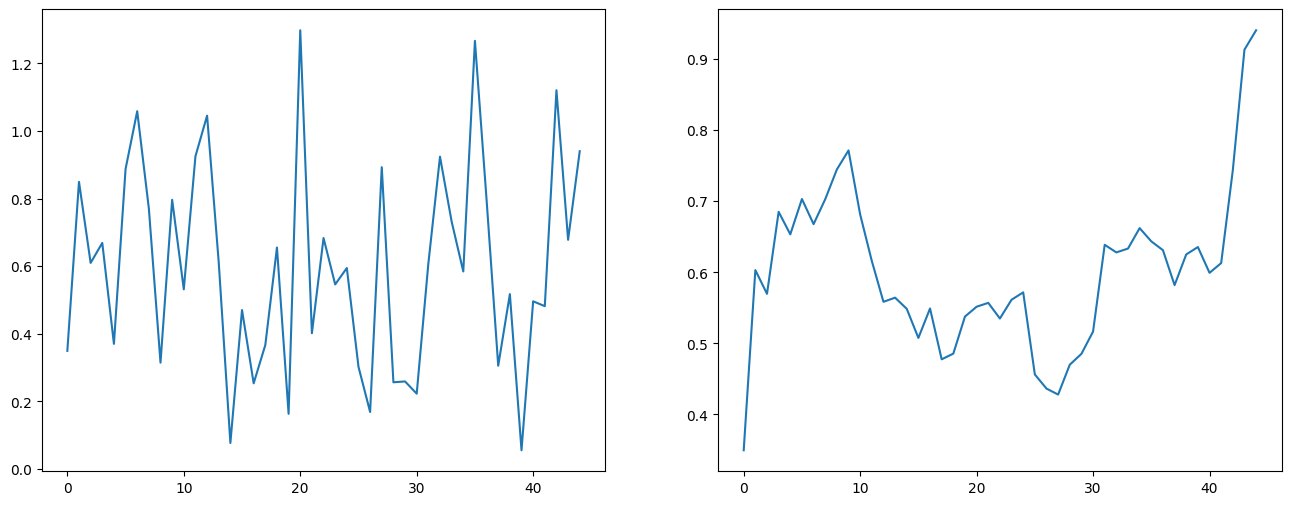

In [31]:
# 0414
draw_results(path="./runs/DVHL__ppo__0414133931__3407/", mode=0)

1440
45


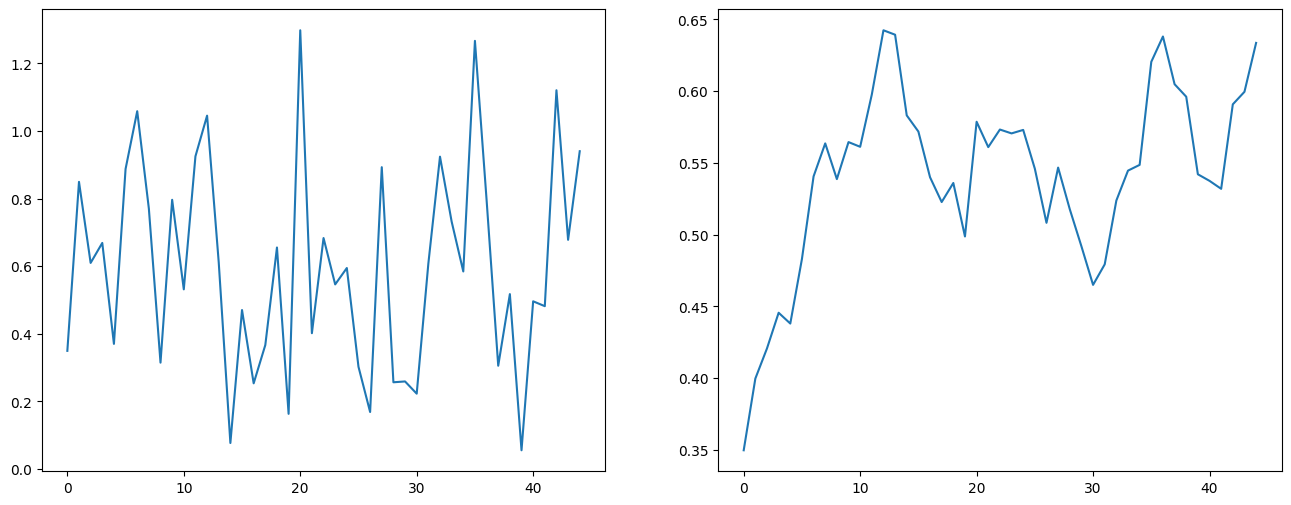

In [30]:
# 0417
draw_results(path="./runs/DVHL__ppo__0417170009__3407/", mode=1)